In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import torch
import numpy as np
import torch.optim as optim 
import math
import matplotlib.pyplot as plt
import matplotlib
from junctionart.roundabout.RoundaboutLaneEncodingEnv import RoundaboutLaneEncodingEnv
from junctionart.roundabout.GFNAgent2 import GFNAgent2
from junctionart.roundabout.FlowFunction import FlowFunction as FF
from tqdm import tqdm

threePoints = [
            {"x": 80, "y": 20, "heading": math.radians(45),'leftLane': 1, 'rightLane': 1, 'medianType': None, 'skipEndpoint': None},
            {"x": 210, "y": 20, "heading": math.radians(220),'leftLane': 1, 'rightLane': 1, 'medianType': None, 'skipEndpoint': None},
        ]
env = RoundaboutLaneEncodingEnv()
config = [0, 0, 0, 0]
env.generateWithRoadDefinition(threePoints,outgoingLanesMerge=False,nSegments=30,laneToCircularId=config, createOdr=True)
circularPoints, roadEndPoints = env.getCircularPointsAndRoadEndPoints(threePoints, 30)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

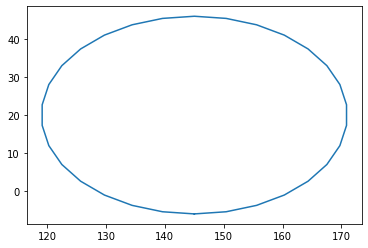

In [23]:
from shapely.geometry import LinearRing, LineString, Point

circle = LinearRing([(point[0], point[1]) for point in circularPoints])

plt.plot(*circle.xy)
ind = []
for i in range(circularPoints.shape[0]):
    circularPoint = circularPoints[i]
    line = LineString([roadEndPoints[3], circularPoint])

    if type(line.intersection(circle)) == Point:
        ind.append(i)

ind

In [25]:
action_indice=torch.arange(0,4*30).reshape(4,30)
action_space=torch.nn.functional.one_hot(action_indice.flatten())

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 1]])